SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.(This gets done by kernal function of SVM classifier ). A separator between the catagories is found, then the data is transformed in such way that the separator could be drawn as hyperplane.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
df = pd.read_csv('cell_samples.csv')

In [27]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [28]:
print(df.info())
print ('--' * 120)
print (df.describe())
print ('--' * 120)
print(df.isnull().sum())
print ('--' * 120)
print(len(df))
print ('--' * 120)
print(df.shape)
print ('--' * 120)
print(df.count())
print ('--' * 120)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                 ID       Clump    UnifSize   UnifShape     Marg

In [29]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [30]:
benign_df = df[df['Class']==2] [0::]
malignant_df = df[df['Class']==4] [0::]


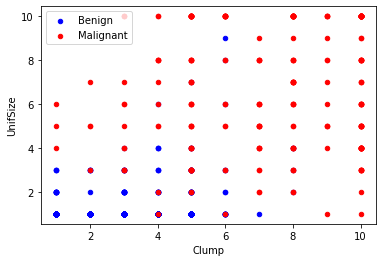

In [31]:
axes = benign_df.plot (kind = 'scatter' , x = 'Clump' , y = 'UnifSize' , color = 'blue' , label = 'Benign')
malignant_df.plot (kind = 'scatter' , x = 'Clump' , y = 'UnifSize' , color = 'red' , label = 'Malignant' , ax = axes)


In [32]:
df.dtypes 

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [36]:
df  = df[pd.to_numeric(df['BareNuc'] , errors = 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [37]:
df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [39]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

In [40]:
x = np.asarray(feature_df)
y= np.asarray(df['Class'])

In [41]:
from sklearn.model_selection import train_test_split


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

In [45]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear' , gamma = 'auto' , C=2)
classifier.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [46]:
y_predict = classifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

